## Überblick über dieses Notebook

Dieses Notebook analysiert und visualisiert Flüchtlingszahlen in Relation zur Bevölkerung für ausgewählte Herkunfts- und Aufnahmeländer.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_population_vs_refugee_percentage(df, country, data_type):
    sub = df[df["country"] == country].copy()
    
    if sub.empty:
        print("No data.")
        return

    sub = sub.sort_values("Year")
    
    years = sub["Year"]
    population = sub["Population"]
    refugees = sub["Refugee_amount"]
    percent = sub["refugee_share"] * 100  # convert to %

    fig, ax1 = plt.subplots(figsize=(14,6))

    # Grey population bars
    ax1.bar(years, population, color="lightgrey", label="Bevölkerung")

    # Red refugee bars
    ax1.bar(years, refugees, color="red", alpha=0.8, label="Anzahl Geflüchtete")
    # Add dummy entry to legend for percentage labels
    ax1.plot([], [], color="black", label="Flüchtlingsanteil (%) ")
    ax1.legend(loc="upper right")


    ax1.set_ylabel("Bevölkerung/ Anzahl Geflüchtete")
    ax1.set_xlabel("Jahr")

    # Titles depending on dataset
    if data_type == "Origin":
        ax1.set_title(f"{country}:  Bevölkerung vs. Anteil der Bevölkerung, die geflohen ist")
    else:
        ax1.set_title(f"{country}:  Bevölkerung vs. Anteil der aufgenommenen Flüchtlinge")

    # Place percentage text **on top of the grey bars**
    for i, (x, pop, pct) in enumerate(zip(years, population, percent)):
        ax1.text(
            x, 
            pop, 
            f"{pct:.1f}", 
            ha="center", 
            va="bottom", 
            fontsize=8,
            color="black"
        )

    plt.legend()
    plt.tight_layout()
    plt.show()

Der Code visualisiert für ausgewählte Länder die Entwicklung von Bevölkerung, absoluter Flüchtlingszahl und relativem Flüchtlingsanteil über die Zeit und stellt diese gemeinsam in einem Balkendiagramm dar.

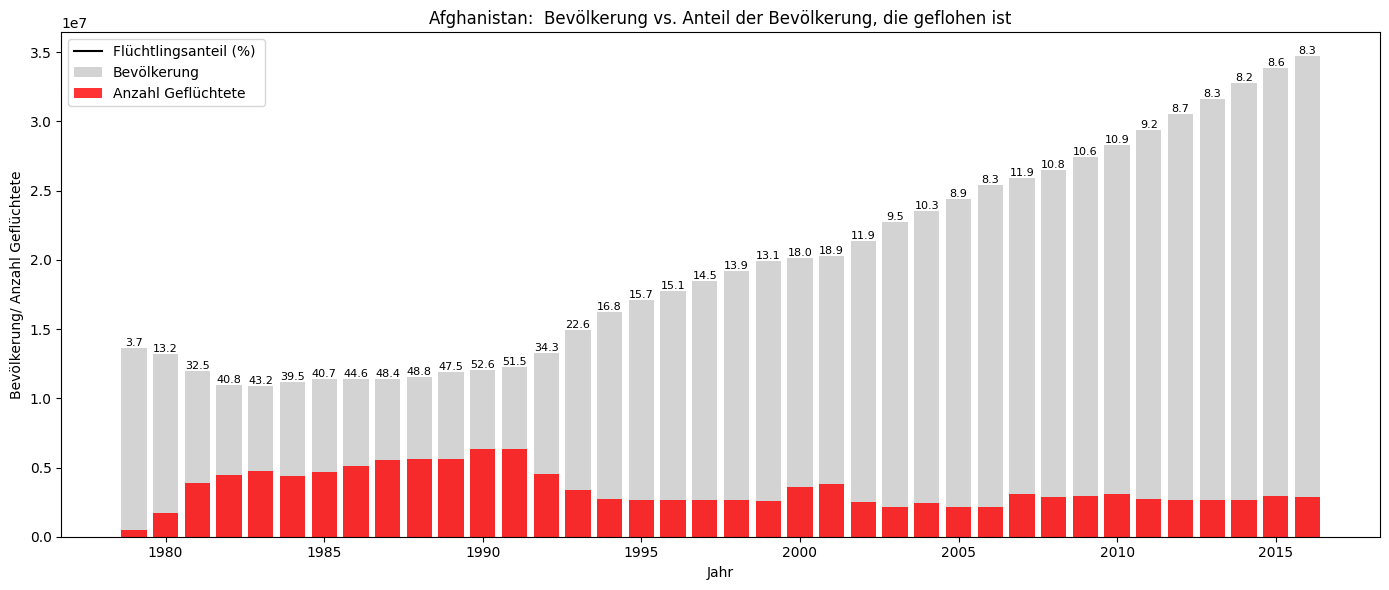

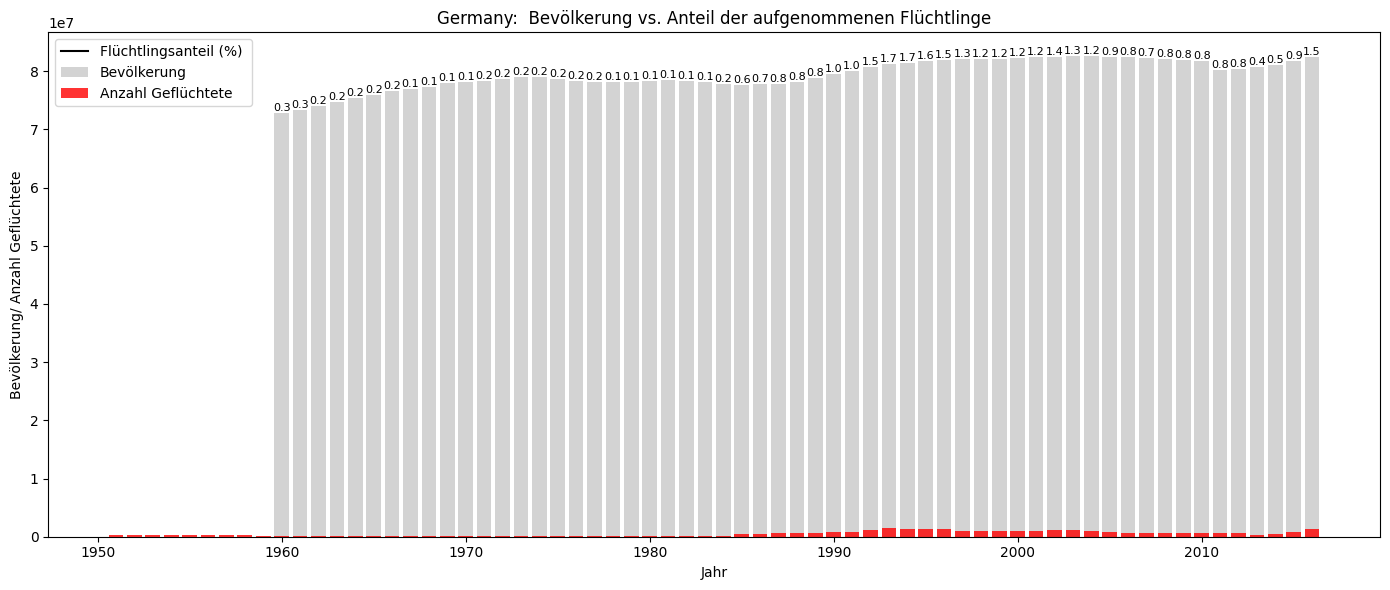

In [26]:
df = pd.read_csv("output_csv_files/Origin_refugees_per_capita.csv")
plot_population_vs_refugee_percentage(df, "Afghanistan", data_type="Origin")

dt = pd.read_csv("output_csv_files/Destination_refugees_per_capita.csv")

plot_population_vs_refugee_percentage(dt, "Germany", data_type="Destination")


Die fünf Länder mit den höchsten absoluten Zahlen werden in einem
Balkendiagramm dargestellt.


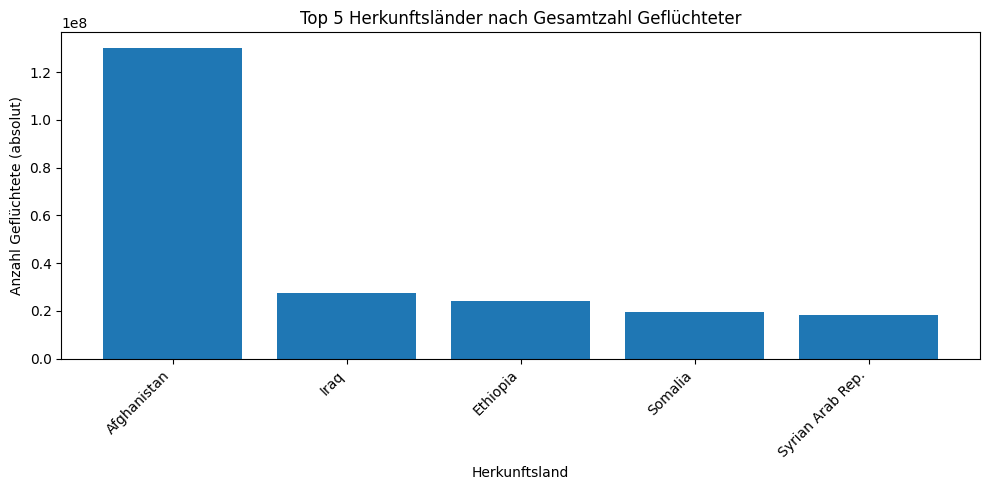

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

path_origin = r"output_csv_files/Origin_refugees_per_capita.csv"
df_origin = pd.read_csv(path_origin)

country_col = "country"

origin_totals = (
    df_origin
    .groupby(country_col)["Refugee_amount"]
    .sum()
    .sort_values(ascending=False)
)

top_origins = origin_totals.head(5)

plt.figure(figsize=(10, 5))
plt.bar(top_origins.index, top_origins.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Anzahl Geflüchtete (absolut)")
plt.xlabel("Herkunftsland")
plt.title("Top 5 Herkunftsländer nach Gesamtzahl Geflüchteter")
plt.tight_layout()
plt.show()



Für jedes Herkunftsland wird der durchschnittliche Anteil an Geflüchteten
relativ zur Bevölkerung berechnet. Die fünf Länder mit den höchsten
Durchschnittswerten werden ausgewählt.

Die Verteilung dieser Anteile über die Jahre wird mithilfe von Boxplots
dargestellt, um Unterschiede und Streuungen sichtbar zu machen.







C:\Users\paulk\AppData\Local\Temp\ipykernel_30728\684689961.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


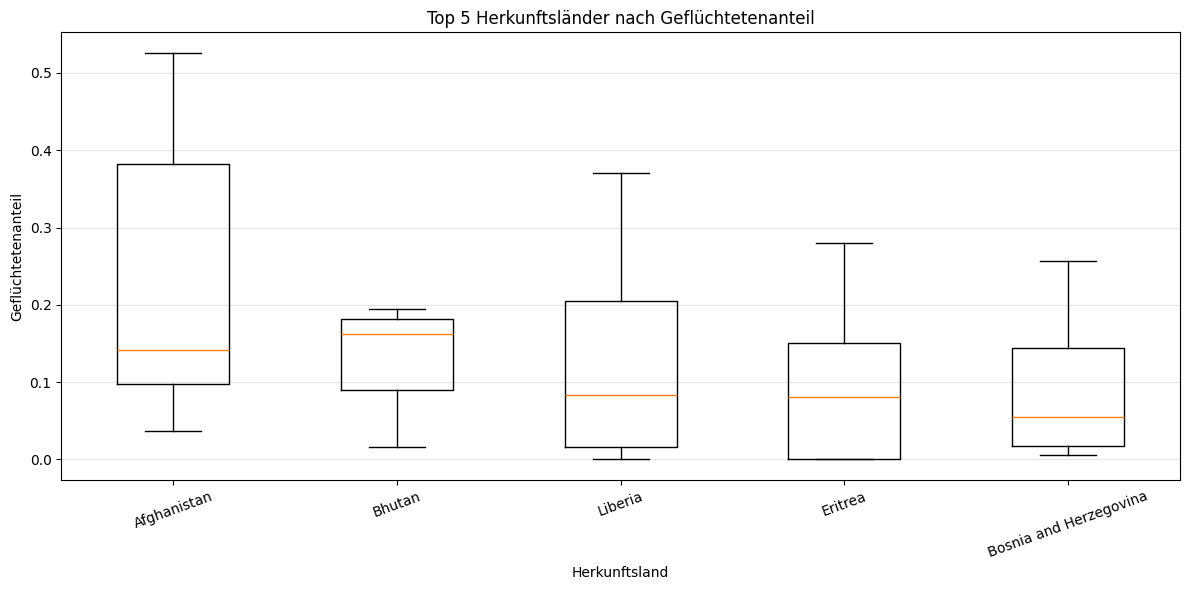

In [28]:
share_col = "refugee_share"

avg_share_origin = (
    df_origin
    .groupby(country_col)[share_col]
    .mean()
    .sort_values(ascending=False)
)

top5_origin = avg_share_origin.head(5).index
df_top5_origin = df_origin[df_origin[country_col].isin(top5_origin)]

plt.figure(figsize=(12, 6))
plt.boxplot(
    [df_top5_origin[df_top5_origin[country_col] == c][share_col] for c in top5_origin],
    labels=top5_origin
)

plt.title("Top 5 Herkunftsländer nach Geflüchtetenanteil")
plt.xlabel("Herkunftsland")
plt.ylabel("Geflüchtetenanteil")
plt.xticks(rotation=20)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


Die fünf Länder mit den höchsten absoluten Aufnahmezahlen werden in einem
Balkendiagramm dargestellt.

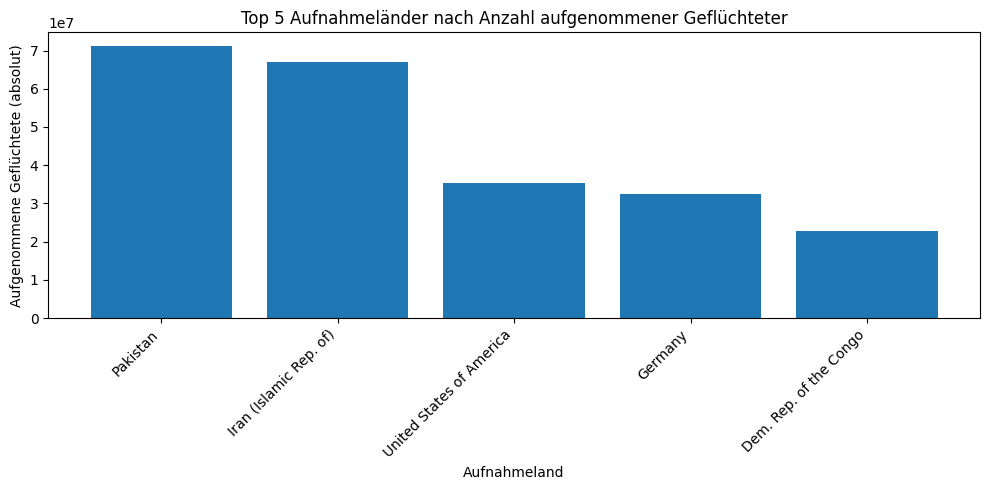

In [29]:
path_dest = r"output_csv_files/Destination_refugees_per_capita.csv"
df_dest = pd.read_csv(path_dest)

dest_totals = (
    df_dest
    .groupby("country")["Refugee_amount"]
    .sum()
    .sort_values(ascending=False)
)

top5_dest_abs = dest_totals.head(5)

plt.figure(figsize=(10, 5))
plt.bar(top5_dest_abs.index, top5_dest_abs.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Aufgenommene Geflüchtete (absolut)")
plt.xlabel("Aufnahmeland")
plt.title("Top 5 Aufnahmeländer nach Anzahl aufgenommener Geflüchteter")
plt.tight_layout()
plt.show()




Für jedes Aufnahmeland wird der durchschnittliche Geflüchtetenanteil
relativ zur Bevölkerung berechnet. Die fünf Länder mit den höchsten
Durchschnittswerten werden ausgewählt.

Die zeitliche Verteilung dieser Anteile wird mithilfe von Boxplots
visualisiert.








C:\Users\paulk\AppData\Local\Temp\ipykernel_30728\567190009.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


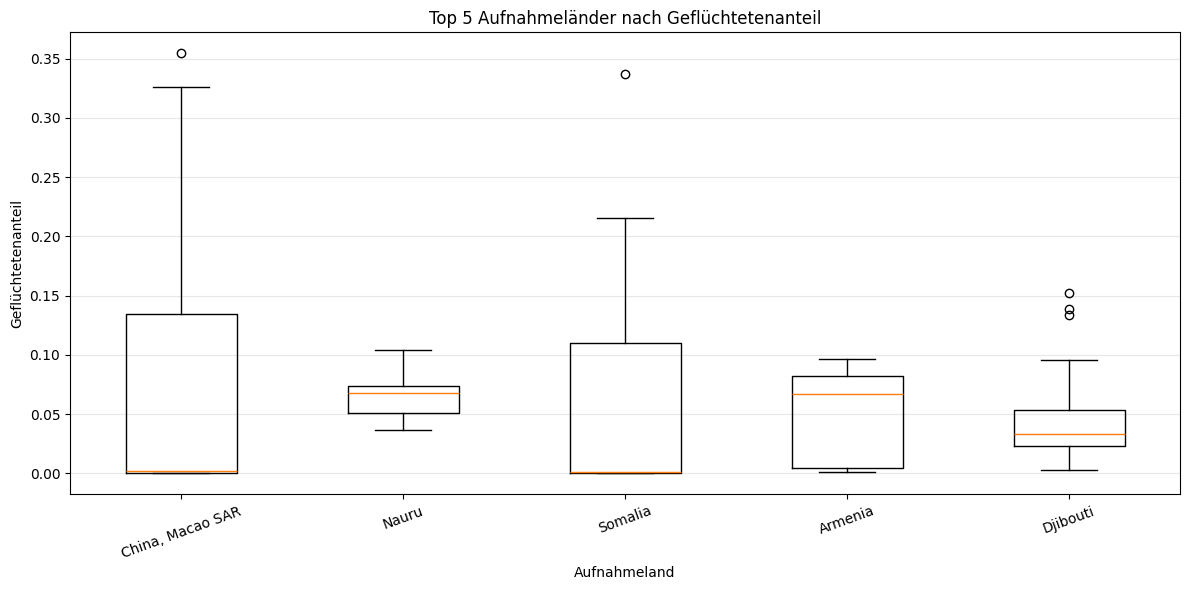

In [30]:
avg_share_dest = (
    df_dest
    .groupby("country")["refugee_share"]
    .mean()
    .sort_values(ascending=False)
)

top5_dest_rel = avg_share_dest.head(5).index
df_top5_dest = df_dest[df_dest["country"].isin(top5_dest_rel)]

plt.figure(figsize=(12, 6))
plt.boxplot(
    [df_top5_dest[df_top5_dest["country"] == c]["refugee_share"] for c in top5_dest_rel],
    labels=top5_dest_rel
)

plt.title("Top 5 Aufnahmeländer nach Geflüchtetenanteil")
plt.xlabel("Aufnahmeland")
plt.ylabel("Geflüchtetenanteil")
plt.xticks(rotation=20)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()
